# Présentation graphique des données de contacts Hi-C normalisés

In [1]:
import os.path as op
import matplotlib.pyplot as plt
import numpy as np
import pandas
import h5py
import math

In [2]:
import cooler

In [3]:
# The following directive activates inline plotting
%matplotlib inline

In [4]:
#filepath = "/home/bureau/projects/def-bureau/distiller/results_iPSC/coolers_library_group/Neuron_libraries.hg38.mapq_30.2048.cool"
filepath = "/home/bureau/projects/def-bureau/distiller/results_iPSC/coolers_library_group/Neuron_libraries.hg38.mapq_30.8192.mcool::resolutions/8192"

In [5]:
c = cooler.Cooler(filepath)

Vecteur des chromosomes

In [6]:
chr_seq = []
for chr in range(1,23):
    chr_seq.append("chr" + str(chr))
chr_seq

['chr1',
 'chr2',
 'chr3',
 'chr4',
 'chr5',
 'chr6',
 'chr7',
 'chr8',
 'chr9',
 'chr10',
 'chr11',
 'chr12',
 'chr13',
 'chr14',
 'chr15',
 'chr16',
 'chr17',
 'chr18',
 'chr19',
 'chr20',
 'chr21',
 'chr22']

In [7]:
import scipy.sparse as sparse

/cvmfs/soft.computecanada.ca/easybuild/software/2020/avx512/Core/scipy-stack/2020b/lib/python3.8/site-packages/matplotlib/axes/_axes.py:7680: RuntimeWarning: invalid value encountered in greater
  nonzero = np.abs(c.data) > precision
<ipython-input-8-b4733075a52a>:9: RuntimeWarning: divide by zero encountered in log10
  im = ax2.matshow(np.log10(arr), cmap='YlOrRd')


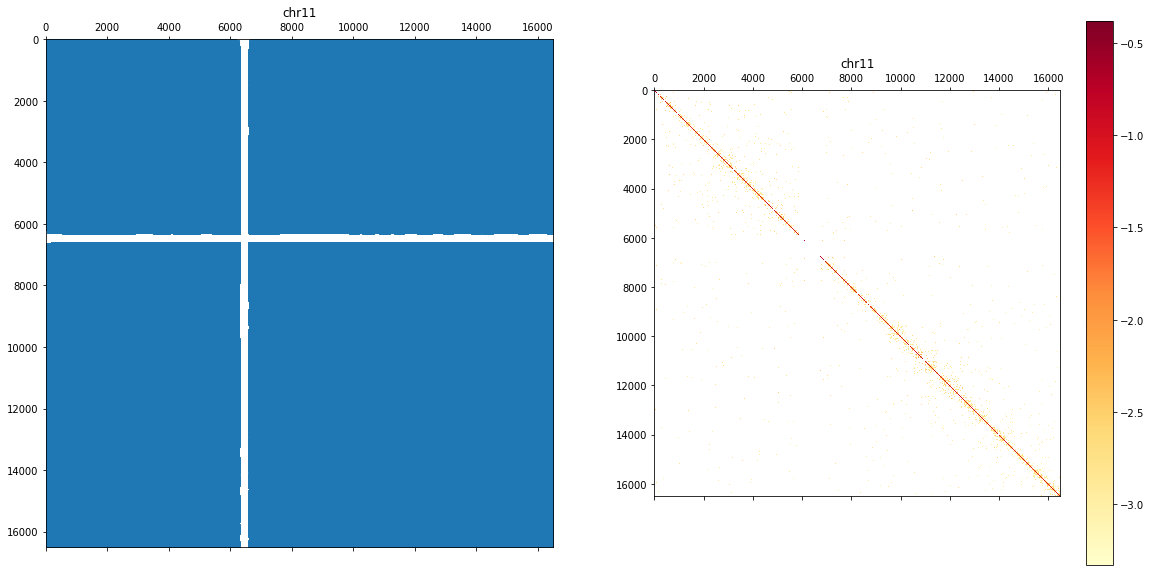

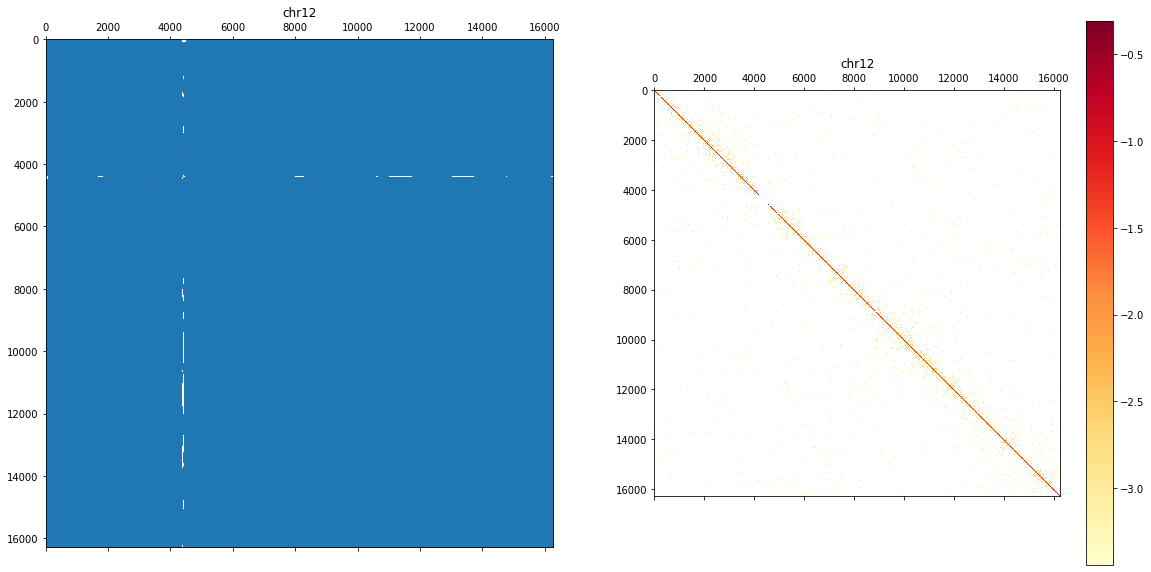

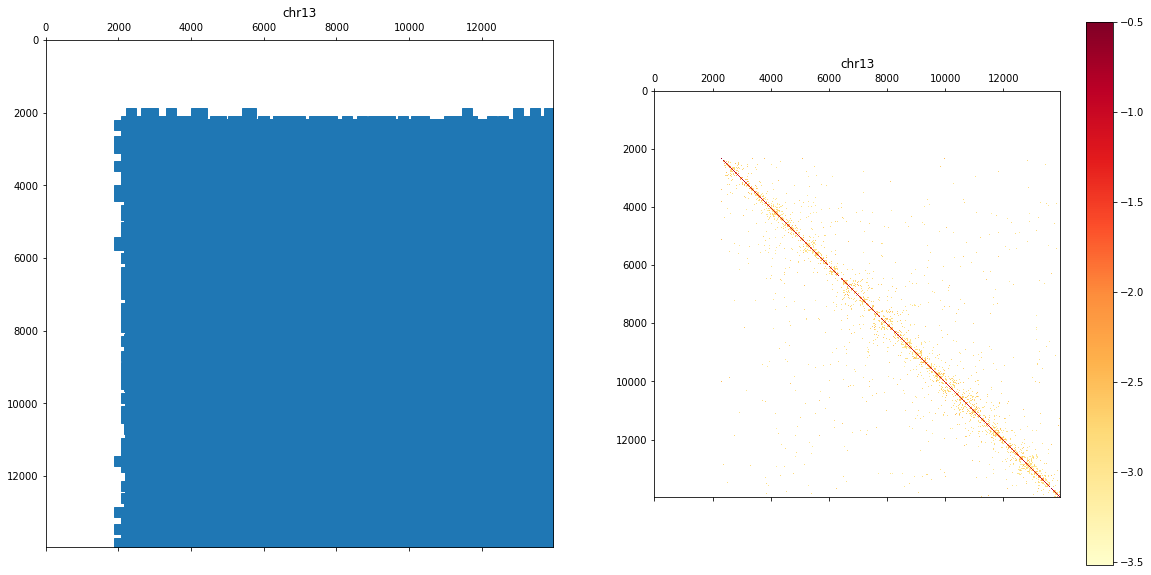

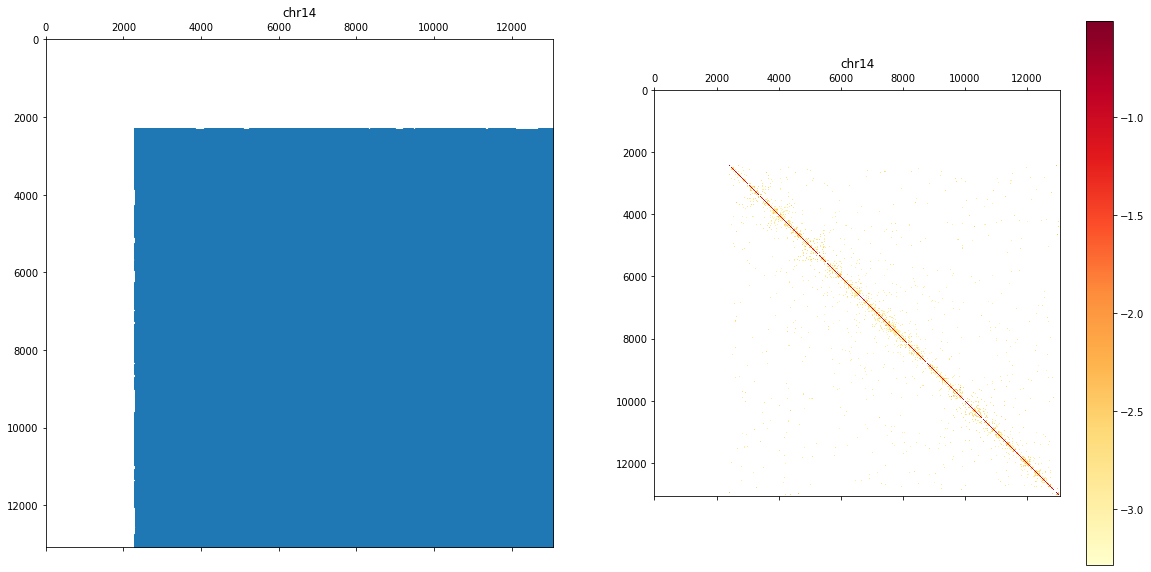

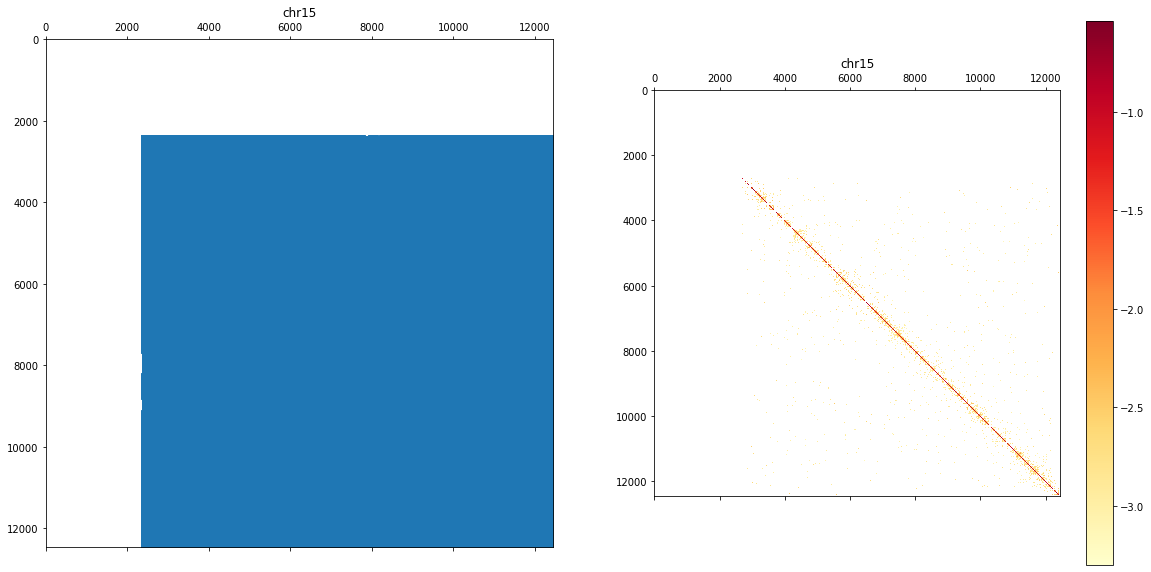

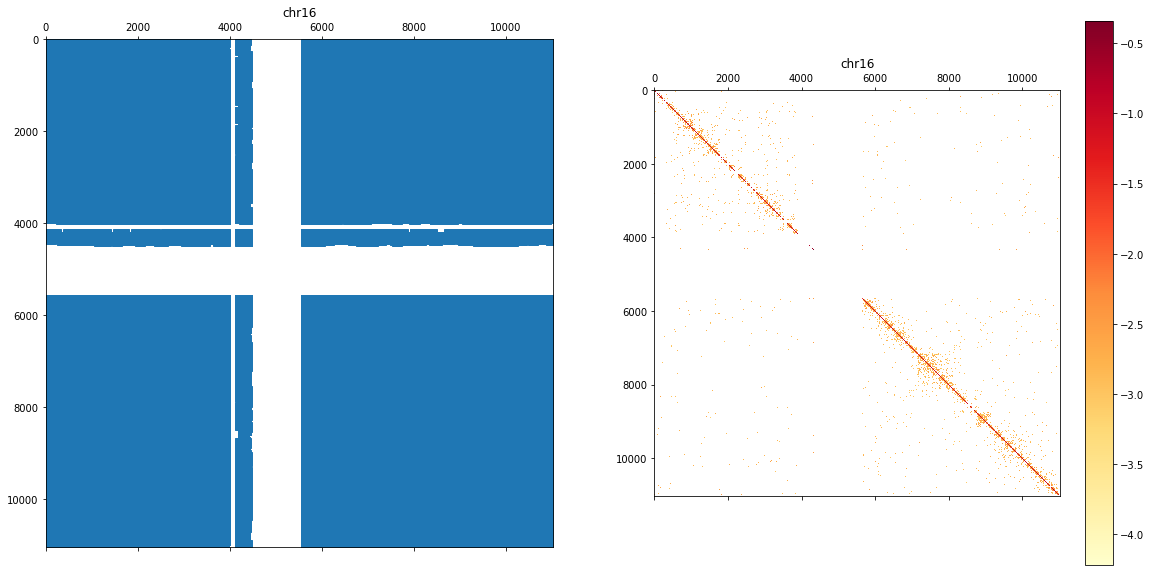

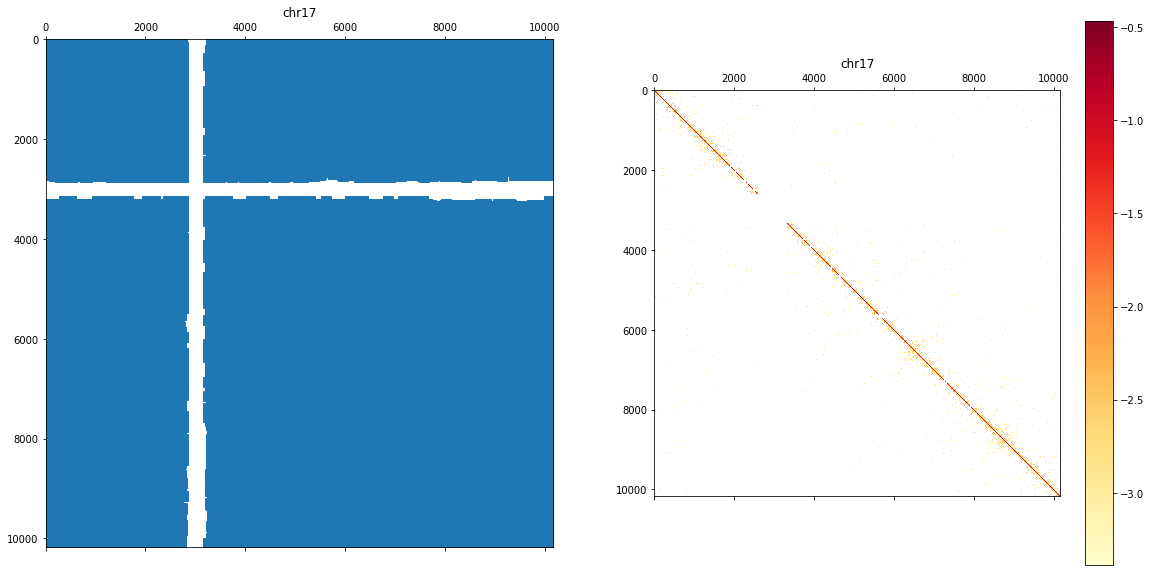

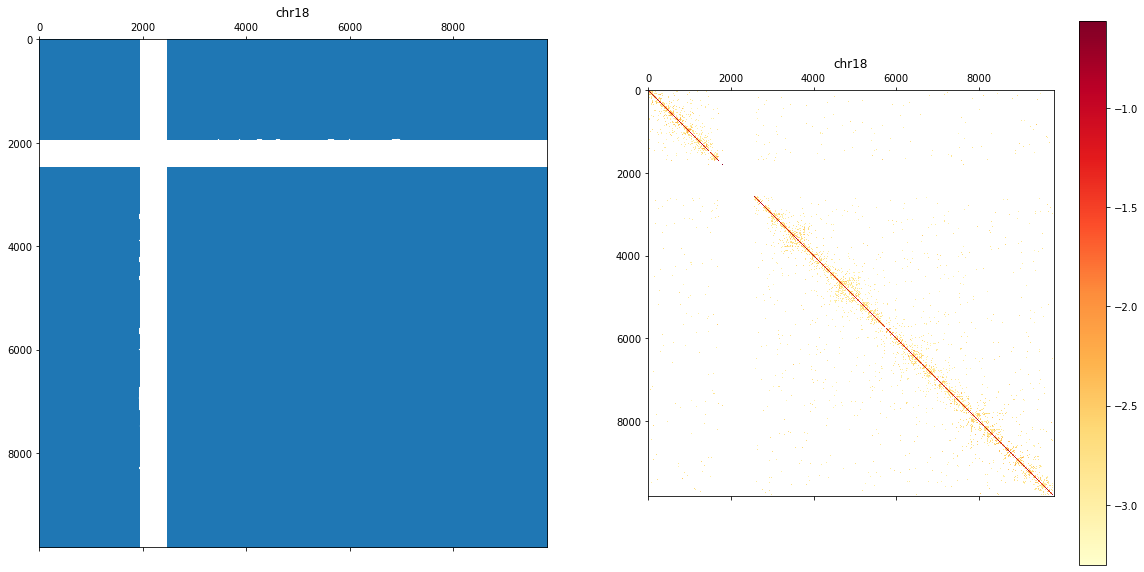

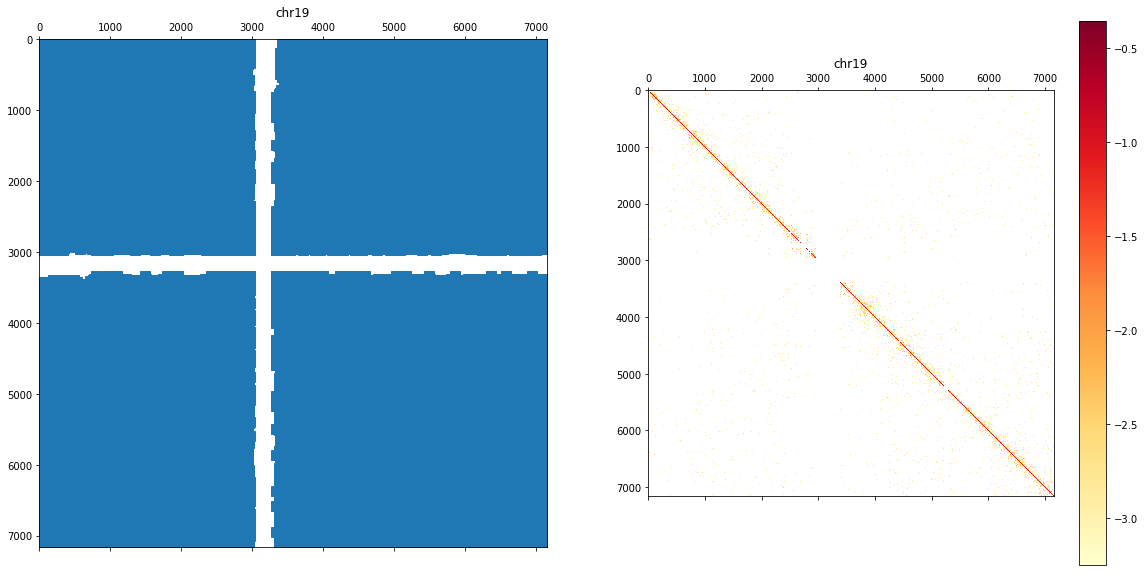

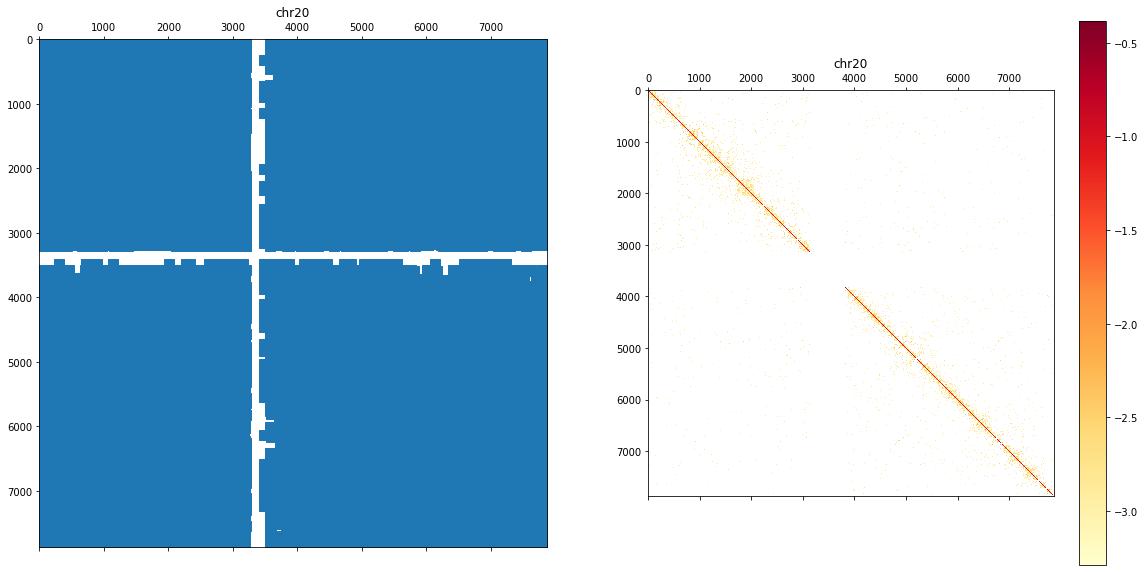

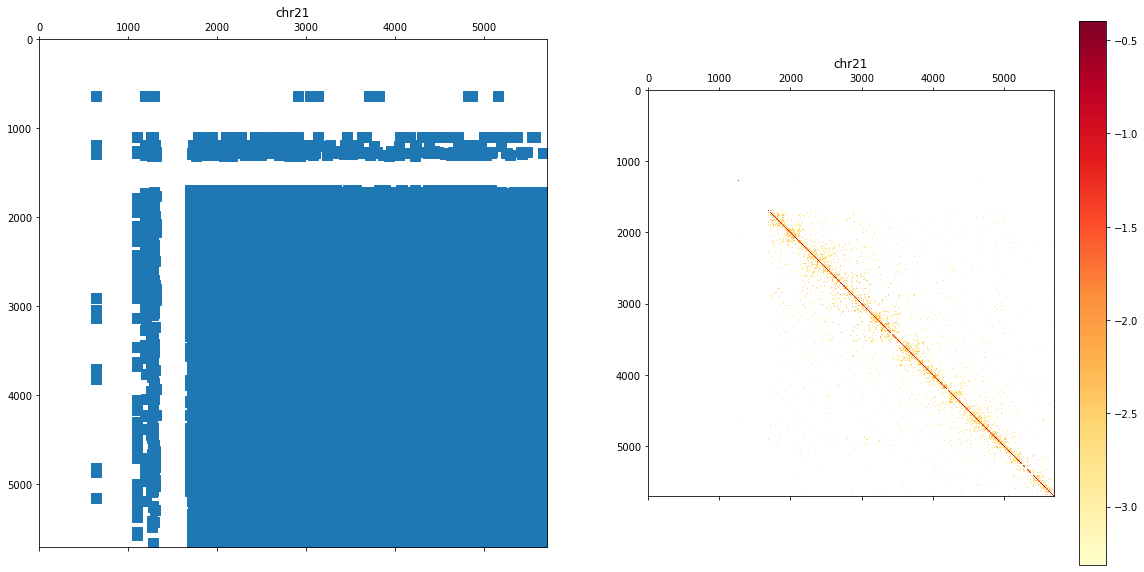

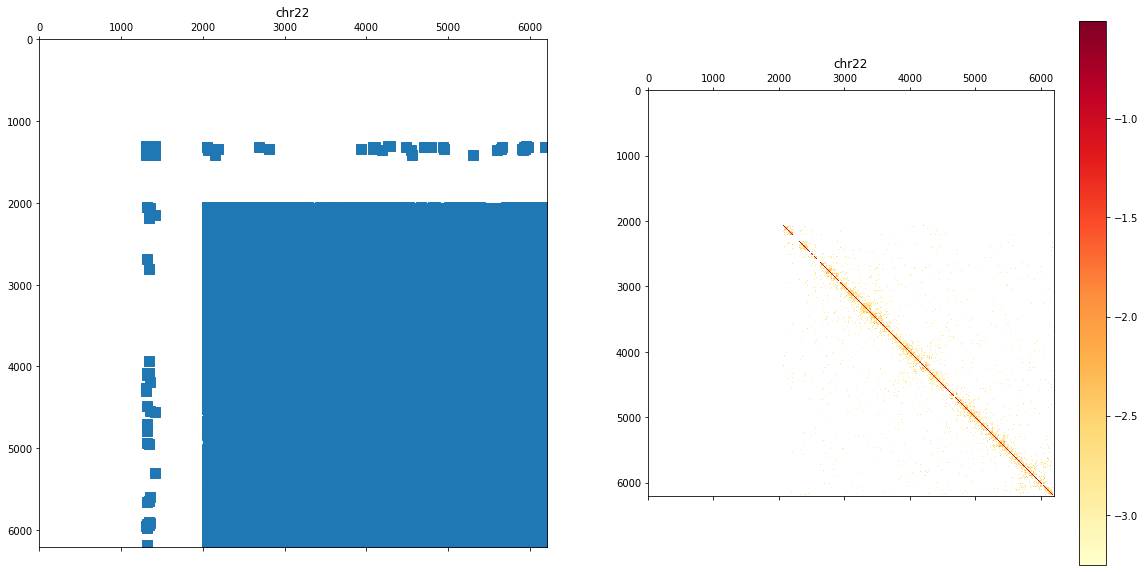

In [8]:
# Pas assez de mémoire pour présenter les gros chromosomes en entier
for chr in chr_seq[10:22]:
    tmp = c.matrix(balance=True, sparse=True).fetch(chr)
    arr= tmp.toarray()
    arr_sp= sparse.csr_matrix(arr)
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
    ax1.spy(arr_sp)
    ax1.set_title(chr)
    im = ax2.matshow(np.log10(arr), cmap='YlOrRd')
    ax2.set_title(chr)
    fig.colorbar(im)


In [ ]:
%whos

In [10]:
arr[2000:2200, 2000:2200]

array([[0.05943857, 0.03341148, 0.0325555 , ..., 0.        , 0.00117358,
        0.        ],
       [0.03341148, 0.08465703, 0.02889032, ..., 0.        , 0.00151485,
        0.        ],
       [0.0325555 , 0.02889032, 0.06477738, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.07450926, 0.02341076,
        0.01508379],
       [0.00117358, 0.00151485, 0.        , ..., 0.02341076, 0.08045236,
        0.03645628],
       [0.        , 0.        , 0.        , ..., 0.01508379, 0.03645628,
        0.07137087]])